In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Fig.2

In [2]:
base_path = '../result/comparison_result/NSCLC/'
path = base_path+'AutoCancer.csv'
autocancer = pd.read_csv(path)
metric_vars = ['accuracy', 'precision', 'recall', 'roc_auc', 'pr_auc']
autocancer_all = autocancer.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign( model='AutoCancer')

path = base_path+'Lung-clip.csv'
lungclip = pd.read_csv(path)
lungclip_all = lungclip.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign(model='Lung-CLiP')
performance_all = pd.concat([autocancer_all, lungclip_all], axis=0)

### Fig.2A

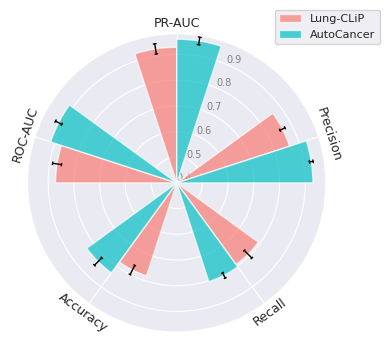

In [3]:
dataset = 'validation'
sns.set_style('darkgrid')

mean_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].mean().reset_index()
std_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].sem().reset_index()

order = ['pr_auc', 'precision', 'recall', 'accuracy','roc_auc']
mean_performance['metric'] = pd.Categorical(mean_performance['metric'], categories=order, ordered=True)

mean_performance = mean_performance.sort_values(['metric', 'model']).reset_index(drop=True)


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, polar=True)
metrics = ['PR-AUC', 'Precision', 'Recall', 'Accuracy', 'ROC-AUC']

colors = ['#F87C73', '#03BFC4']
models = ['Lung-CLiP', 'AutoCancer']

num_metrics = len(metrics)
num_models = len(models)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

bar_width = 2 * np.pi / (2 * num_models * num_metrics)
rotation_angle = bar_width / 2

y_min,y_max = 0.4,0.98
y_size = [round(y_min+i*0.1,1) for i in range(int((y_max-y_min)/0.1)+1)]
ax.set_ylim(0, y_max - y_min)

for i, (model, color) in enumerate(zip(models, colors)):
    model_data = mean_performance[mean_performance['model'] == model].sort_values(by='metric')['value'].values - y_min
    model_std = std_performance[std_performance['model'] == model].sort_values(by='metric')['value'].values
    bars = ax.bar([angle - rotation_angle + i * bar_width for angle in angles], model_data, width=bar_width, color=color, alpha=0.7, label=model)
    for bar, std, angle in zip(bars, model_std, angles):
        x1, x2 = bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2
        y1, y2 = bar.get_height() - std, bar.get_height() + std
        ax.plot([angle - rotation_angle + i * bar_width, angle - rotation_angle + i * bar_width], [y1, y2], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y1, y1], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y2, y2], color='black', linewidth=1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels('')

for i, (angle, metric) in enumerate(zip(angles, metrics)):
    if i in [1, 4]:
        rotation = -angle / np.pi / 2 * 360
    elif i in [2, 3]:
        rotation = -angle / np.pi / 2 * 360 + 180
    else:
        rotation = 0
    ax.text(angle, 0.62, metric, size=9, rotation=rotation, ha='center', va='center')

ax.set_yticks(np.array(y_size) - y_min)
ax.set_yticklabels(y_size, fontsize=7, color='grey')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8)
plt.tight_layout()

### Fig.2B

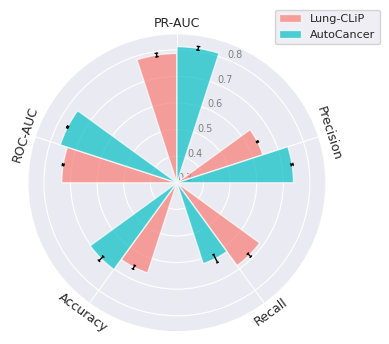

In [4]:
dataset = 'test'
sns.set_style('darkgrid')

mean_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].mean().reset_index()
std_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].sem().reset_index()

order = ['pr_auc', 'precision', 'recall', 'accuracy','roc_auc']
mean_performance['metric'] = pd.Categorical(mean_performance['metric'], categories=order, ordered=True)

mean_performance = mean_performance.sort_values(['metric', 'model']).reset_index(drop=True)


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, polar=True)
metrics = ['PR-AUC', 'Precision', 'Recall', 'Accuracy', 'ROC-AUC']

colors = ['#F87C73', '#03BFC4']
models = ['Lung-CLiP', 'AutoCancer']

num_metrics = len(metrics)
num_models = len(models)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

bar_width = 2 * np.pi / (2 * num_models * num_metrics)
rotation_angle = bar_width / 2

y_min, y_max = 0.3, 0.86
y_size = [round(y_min+i*0.1,1) for i in range(int((y_max-y_min)/0.1)+1)]

ax.set_ylim(0, y_max - y_min)

for i, (model, color) in enumerate(zip(models, colors)):
    model_data = mean_performance[mean_performance['model'] == model].sort_values(by='metric')['value'].values - y_min
    model_std = std_performance[std_performance['model'] == model].sort_values(by='metric')['value'].values
    bars = ax.bar([angle - rotation_angle + i * bar_width for angle in angles], model_data, width=bar_width, color=color, alpha=0.7, label=model)
    for bar, std, angle in zip(bars, model_std, angles):
        x1, x2 = bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2
        y1, y2 = bar.get_height() - std, bar.get_height() + std
        ax.plot([angle - rotation_angle + i * bar_width, angle - rotation_angle + i * bar_width], [y1, y2], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y1, y1], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y2, y2], color='black', linewidth=1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels('')

for i, (angle, metric) in enumerate(zip(angles, metrics)):
    if i in [1, 4]:
        rotation = -angle / np.pi / 2 * 360
    elif i in [2, 3]:
        rotation = -angle / np.pi / 2 * 360 + 180
    else:
        rotation = 0
    ax.text(angle, 0.6, metric, size=9, rotation=rotation, ha='center', va='center')

ax.set_yticks(np.array(y_size) - y_min)
ax.set_yticklabels(y_size, fontsize=7, color='grey')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8)
plt.tight_layout()

### Fig.2C

In [5]:
metric = ['accuracy','roc_auc', 'pr_auc']
path = base_path+'AutoCancer.csv'
autocancer = pd.read_csv(path)
performance_all = autocancer.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign( model='AutoCancer')

path = base_path+'RandomForestClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='RandomForest')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'SVC.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='SVM')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'GradientBoostingClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='GradientBoosting')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'GaussianProcessClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='GaussianProcess')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'AdaBoostClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='AdaBoost')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'ExtraTreesClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='ExtraTrees')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'SGDClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='SGD')
performance_all = pd.concat([performance_all, model_melt], axis=0)

path = base_path+'MLPClassifier.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='MLP')
performance_all = pd.concat([performance_all, model_melt], axis=0)


path = base_path+'Bi-LSTM.csv'
model_all = pd.read_csv(path)
model_melt = model_all.melt(id_vars=['repeats', 'set'], value_vars=metric, 
var_name='metric', value_name='value').assign(model='Bi-LSTM')
performance_all = pd.concat([performance_all, model_melt], axis=0)

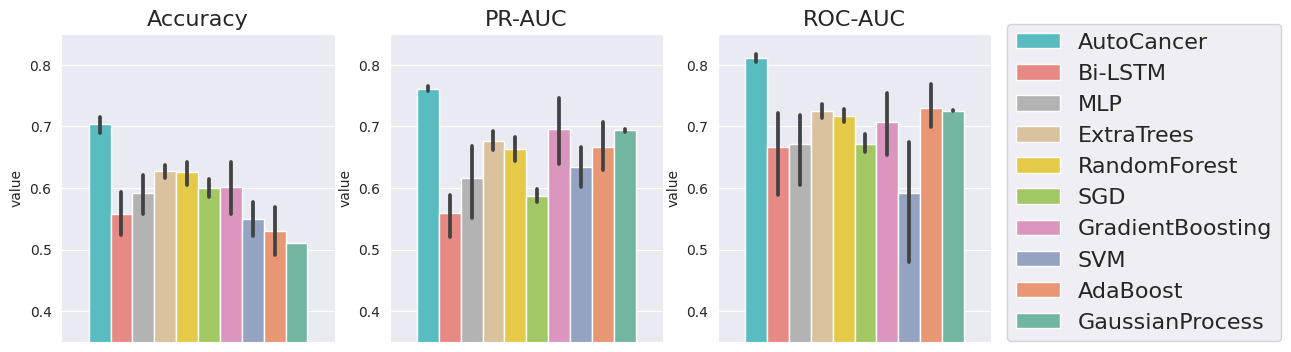

In [6]:
dataset = 'test'
sns.set_style('darkgrid')
colors = ['#48CCD1', '#F87C73']+sns.color_palette("Set2")[::-1]

metrics = ['accuracy', 'roc_auc', 'pr_auc']
metrics_print = ['Accuracy', 'PR-AUC','ROC-AUC']

fig, axes = plt.subplots(ncols=len(metrics), figsize=(4*len(metrics),4))

for i, metric in enumerate(metrics):
    data = performance_all[(performance_all.set == dataset) & (performance_all.metric == metric)]
    sns.barplot(data=data, x='metric', y='value', ax=axes[i],
                hue="model", hue_order=['AutoCancer', 'Bi-LSTM', 'MLP','ExtraTrees', 'RandomForest', 'SGD',
                                        'GradientBoosting', 'SVM', 'AdaBoost', 'GaussianProcess'], palette=colors)

    axes[i].set_title(metrics_print[i], fontsize=16)
    axes[i].set_xticklabels([''])
    axes[i].set_xlabel('')

    if i != len(metrics) - 1:
        axes[i].set_ylim(0.35, 0.85)
        axes[i].get_legend().remove()
    else:
        axes[i].set_ylim(0.35, 0.85)
        axes[i].legend(loc='upper right', bbox_to_anchor=(2.1, 1.07), fontsize=16)

plt.subplots_adjust(hspace=0.4)
plt.show()

# Fig.2D

In [7]:
base_path = '../result/comparison_result/LUCAS/'

path = base_path+'AutoCancer.csv'
metrics_df = pd.read_csv(path)
metric_vars = ['accuracy', 'precision', 'recall', 'roc_auc', 'pr_auc']
autocancer_all = metrics_df.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign( model='AutoCancer')

path = base_path+'DELFI.csv'
metrics_df = pd.read_csv(path)
DELFI_all = metrics_df.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign(model='DELFI')

path = base_path+'GENIMI.csv'
metrics_df = pd.read_csv(path)
GENIMI_all = metrics_df.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign(model='GENIMI')

performance_all = pd.concat([autocancer_all, DELFI_all, GENIMI_all], axis=0)

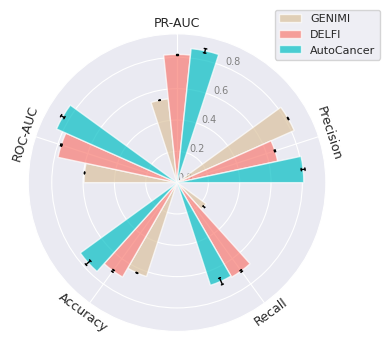

In [8]:
dataset = 'test'
sns.set_style('darkgrid')

mean_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].mean().reset_index()
std_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].sem().reset_index()

order = ['pr_auc', 'precision', 'recall', 'accuracy','roc_auc']
mean_performance['metric'] = pd.Categorical(mean_performance['metric'], categories=order, ordered=True)
mean_performance = mean_performance.sort_values(['metric', 'model']).reset_index(drop=True)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, polar=True)
metrics = ['PR-AUC', 'Precision', 'Recall', 'Accuracy', 'ROC-AUC']
models = ['GENIMI','DELFI','AutoCancer']

num_metrics = len(metrics)
num_models = len(models)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
bar_width = 2 * np.pi / (2 * num_models * num_metrics)
rotation_angle = bar_width 

y_min, y_max = 0, 0.95
interval = 0.2
y_size = [round(y_min+i*interval,1) for i in range(int((y_max-y_min)/interval)+1)]
ax.set_ylim(y_min, y_max)
colors = ['#DBC29E','#F87C73','#03BFC4']
for i, (model, color) in enumerate(zip(models, colors)):
    model_data = mean_performance[mean_performance['model'] == model].sort_values(by='metric')['value'].values - y_min
    model_std = std_performance[std_performance['model'] == model].sort_values(by='metric')['value'].values
    bars = ax.bar([angle - rotation_angle + i * bar_width for angle in angles], model_data, width=bar_width, color=color, alpha=0.7, label=model)
    for bar, std, angle in zip(bars, model_std, angles):
        x1, x2 = bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2
        y1, y2 = bar.get_height() - std, bar.get_height() + std
        ax.plot([angle - rotation_angle + i * bar_width, angle - rotation_angle + i * bar_width], [y1, y2], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y1, y1], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y2, y2], color='black', linewidth=1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels('')
for i, (angle, metric) in enumerate(zip(angles, metrics)):
    if i in [1, 4]:
        rotation = -angle / np.pi / 2 * 360
    elif i in [2, 3]:
        rotation = -angle / np.pi / 2 * 360 + 180
    else:
        rotation = 0
    ax.text(angle, 1.02, metric, size=9, rotation=rotation, ha='center', va='center')

ax.set_yticks(np.array(y_size) - y_min)
ax.set_yticklabels(y_size, fontsize=7, color='grey')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8)
plt.tight_layout()

# Fig.2E

In [9]:
metric_vars = ['accuracy', 'precision', 'recall', 'roc_auc', 'pr_auc']
base_path = '../result/comparison_result/pancancer/'
path = base_path+'ASVM.csv'
metrics_df = pd.read_csv(path)
ASVM_all = metrics_df.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign( model='ASVM')

path = base_path+'DELDI.csv'
metrics_df = pd.read_csv(path)
DELFI_all = metrics_df.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign( model='DELFI')

path = base_path+'AutoCancer.csv'
autocancer = pd.read_csv(path)
autocancer_all = autocancer.melt(id_vars=['repeats', 'set'], value_vars=metric_vars, 
var_name='metric', value_name='value').assign( model='AutoCancer')

performance_all = pd.concat([autocancer_all, ASVM_all, DELFI_all], axis=0)

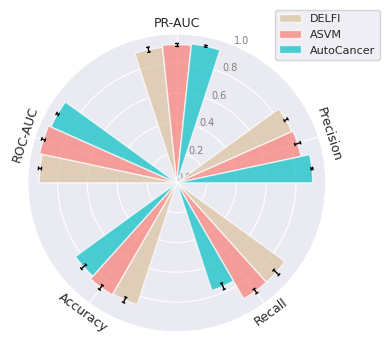

In [10]:
dataset = 'test'
sns.set_style('darkgrid')

mean_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].mean().reset_index()
std_performance = performance_all[performance_all['set'] == dataset].groupby(['metric', 'model'])['value'].sem().reset_index()

order = ['pr_auc', 'precision', 'recall', 'accuracy','roc_auc']
mean_performance['metric'] = pd.Categorical(mean_performance['metric'], categories=order, ordered=True)

mean_performance = mean_performance.sort_values(['metric', 'model']).reset_index(drop=True)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1, polar=True)
metrics = ['PR-AUC', 'Precision', 'Recall', 'Accuracy', 'ROC-AUC']
models = ['DELFI','ASVM','AutoCancer']

num_metrics = len(metrics)
num_models = len(models)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
bar_width = 2 * np.pi / (2 * num_models * num_metrics)
rotation_angle = bar_width

y_min, y_max = 0, 1
interval = 0.2
y_size = [round(y_min+i*interval,1) for i in range(int((y_max-y_min)/interval)+1)]
ax.set_ylim(y_min-y_min, y_max-y_min)
colors = ['#DBC29E','#F87C73','#03BFC4']
for i, (model, color) in enumerate(zip(models, colors)):
    model_data = mean_performance[mean_performance['model'] == model].sort_values(by='metric')['value'].values - y_min
    model_std = std_performance[std_performance['model'] == model].sort_values(by='metric')['value'].values
    bars = ax.bar([angle - rotation_angle + i * bar_width for angle in angles], model_data, width=bar_width, color=color, alpha=0.7, label=model)
    for bar, std, angle in zip(bars, model_std, angles):
        x1, x2 = bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2
        y1, y2 = bar.get_height() - std, bar.get_height() + std
        ax.plot([angle - rotation_angle + i * bar_width, angle - rotation_angle + i * bar_width], [y1, y2], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y1, y1], color='black', linewidth=1)
        ax.plot([angle - rotation_angle + i * bar_width - 0.01, angle - rotation_angle + i * bar_width + 0.01], [y2, y2], color='black', linewidth=1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles)
ax.set_xticklabels('')
for i, (angle, metric) in enumerate(zip(angles, metrics)):
    if i in [1, 4]:
        rotation = -angle / np.pi / 2 * 360
    elif i in [2, 3]:
        rotation = -angle / np.pi / 2 * 360 + 180
    else:
        rotation = 0
    ax.text(angle, 1.07, metric, size=9, rotation=rotation, ha='center', va='center')

ax.set_yticks(np.array(y_size) - y_min)
ax.set_yticklabels(y_size, fontsize=7, color='grey')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=8)
plt.tight_layout()